In [1]:
### DECISION_TREE_CLASSIFICATION

In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import pickle
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder
#### from sklearn.feature_selection import RFECV

In [3]:
data_for_model=pickle.load(open(r"C:\Users\12176\Desktop\lab\Data science\5. Machine_learning\2. Datasets/abc_classification_modelling.p", "rb"))

In [4]:
data_for_model.head()

,customer_id,signup_flag,distance_from_store,gender,credit_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value
0,74,1,3.38,F,0.59,1586.89,195,26,5,61.034231
1,524,1,4.76,F,0.52,2397.26,258,27,5,88.787407
2,607,1,4.45,F,0.49,1279.91,183,22,5,58.177727
3,343,0,0.91,M,0.54,967.14,102,17,5,56.890588
4,322,1,3.02,F,0.63,1566.35,182,30,5,52.211667


In [5]:
data_for_model.drop(["customer_id"], axis=1, inplace =True)
data_for_model = shuffle(data_for_model, random_state = 42)
data_for_model.head()

,signup_flag,distance_from_store,gender,credit_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value
714,0,1.64,M,0.58,27.81,6,3,3,9.270000
605,0,0.88,M,0.63,26.62,9,3,2,8.873333
120,0,0.56,M,0.62,886.78,154,18,4,49.265556
208,0,0.11,M,0.58,1256.19,168,34,5,36.946765
380,0,1.32,M,0.36,739.67,110,21,3,35.222381


In [6]:
### class balance
data_for_model["signup_flag"].value_counts(normalize =True)

0    0.689535
1    0.310465
Name: signup_flag, dtype: float64

In [7]:
## checking for missing values
data_for_model.isna().sum()

signup_flag             0
distance_from_store     5
gender                  5
credit_score            8
total_sales             0
total_items             0
transaction_count       0
product_area_count      0
average_basket_value    0
dtype: int64

In [8]:
## checking for missing values
data_for_model.dropna(how ="any", inplace =True)

In [9]:
## Splitting the dataset into input and output variables
X = data_for_model.drop(["signup_flag"], axis=1)
y = data_for_model["signup_flag"]

In [10]:
## Split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify =y)

In [11]:
## Dealing with categorical variables
encoder= OneHotEncoder(sparse=False,drop= "first")
cat_vars=["gender"]
X_train_encoder=encoder.fit_transform(X_train[cat_vars])
X_test_encoder=encoder.transform(X_test[cat_vars])
feature_names= encoder.get_feature_names(cat_vars)

X_train_encoder =pd.DataFrame(X_train_encoder, columns = feature_names)
X_train = pd.concat([X_train.reset_index(drop=True), X_train_encoder.reset_index(drop=True)],axis=1)
X_train.drop(cat_vars, axis =1, inplace=True)

X_test_encoder =pd.DataFrame(X_test_encoder, columns = feature_names)
X_test = pd.concat([X_test.reset_index(drop=True), X_test_encoder.reset_index(drop=True)],axis=1)
X_test.drop(cat_vars, axis =1, inplace=True)

In [12]:
### ##Model Training
clf = DecisionTreeClassifier(random_state =42, max_depth = 5)
clf.fit(X_train, y_train)
y_pred_class = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_class)
accuracy

0.9294117647058824

In [13]:
y_pred_prob = clf.predict_proba(X_test)[:,1]

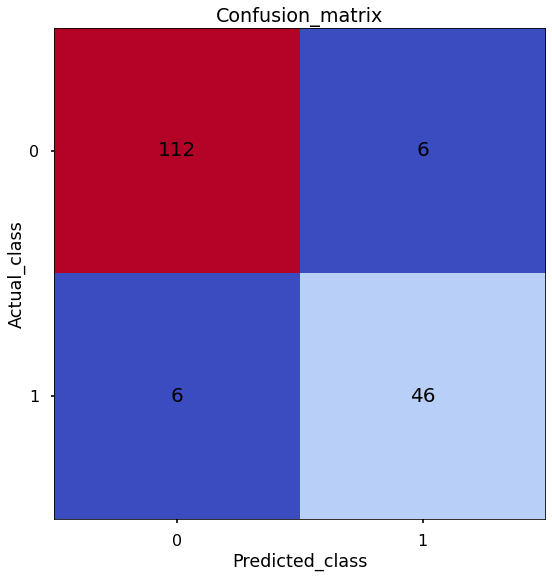

In [14]:
## confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred_class)
conf_matrix

plt.style.use("seaborn-poster")
plt.matshow(conf_matrix, cmap= "coolwarm")
plt.gca().xaxis.tick_bottom()
plt.title("Confusion_matrix")
plt.ylabel("Actual_class")
plt.xlabel("Predicted_class")
for (i,j), corr_value in np.ndenumerate(conf_matrix):
    plt.text(j,i,corr_value, ha ="center", va ="center", fontsize =20)
plt.show()  

In [15]:
### Accuracy (the number of correct classification out of all attempted classification)
accuracy_score(y_test, y_pred_class)

0.9294117647058824

In [16]:
## Precision (of all observations that were predicted negative, how many were actually positive)
precision_score(y_test, y_pred_class)

0.8846153846153846

In [17]:
## Recall (of all positive obs., how many did we predict positive )
recall_score(y_test, y_pred_class)

0.8846153846153846

In [18]:
## F1_score(the harmonic mean of precision and recall)
f1_score(y_test, y_pred_class)

0.8846153846153846

In [19]:
## Finding max_depth
### finding the best max depth for the decision tree model
max_depth=list(range(1,15))
accuracy_scores=[]


In [20]:
for depth in max_depth:
    clf=DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy=f1_score(y_pred, y_test)
    accuracy_scores.append(accuracy)

In [21]:
accuracy_scores

[0.6857142857142856,
 0.7741935483870966,
 0.8347826086956522,
 0.7659574468085107,
 0.8846153846153846,
 0.9056603773584906,
 0.9038461538461539,
 0.8846153846153846,
 0.9245283018867925,
 0.8952380952380953,
 0.8952380952380953,
 0.8952380952380953,
 0.8952380952380953,
 0.8952380952380953]

In [22]:
max_accuracy=max(accuracy_scores)
max_accuracy_idx=accuracy_scores.index(max_accuracy)
optimal_depth=max_depth[max_accuracy_idx]

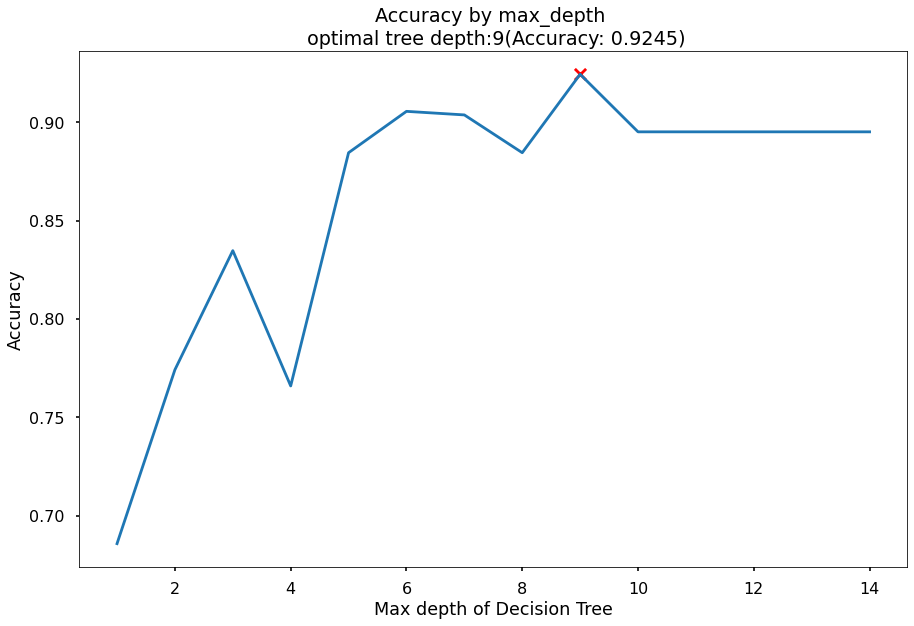

In [23]:
plt.plot(max_depth, accuracy_scores)
plt.scatter(optimal_depth, max_accuracy, marker="x", color="red")
plt.title(f"Accuracy by max_depth \n optimal tree depth:{optimal_depth}(Accuracy: {round(max_accuracy, 4)})")
plt.xlabel("Max depth of Decision Tree")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

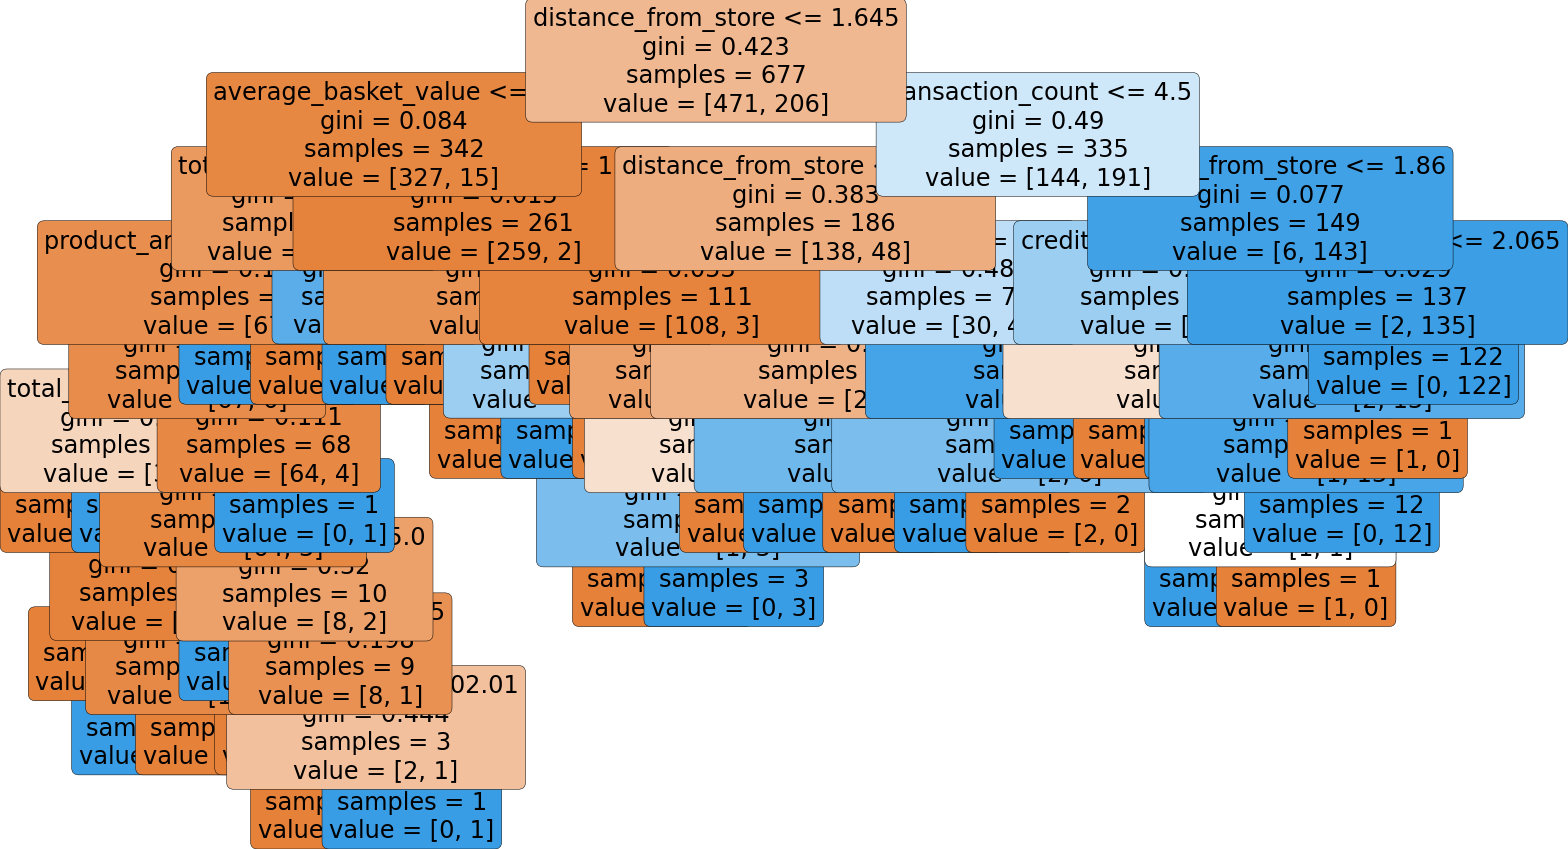

In [24]:
### Plot our tree
plt.figure(figsize=(25,15))  #with max_depth = 5
tree = plot_tree(clf,
                feature_names=X.columns,
                filled=True,
                rounded=True,
                fontsize=24) 

In [25]:
## pickling the model
import pickle
pickle.dump('clf',open('clf_tree.pkl', 'wb'))